# Pips

In [1]:
!pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [2]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 7.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
!pip install accelerate -U

# Import

In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Download Datasets from Kaggle

The original .txt files are at http://www.isi.csic.es/dataset/ , I did my best to produce a .csv from them, still need some work. I kept all the fields intact, even though some are irrelevant for analysis.

kaggle link: https://www.kaggle.com/datasets/ispangler/csic-2010-web-application-attacks?resource=download

kaggle api json: https://drive.google.com/file/d/1KcIlNkkEIAQ3D9TOEeD1RwMAWAxlheFL/view?usp=drive_link

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d ispangler/csic-2010-web-application-attacks
!unzip /content/csic-2010-web-application-attacks.zip

Dataset URL: https://www.kaggle.com/datasets/ispangler/csic-2010-web-application-attacks
License(s): copyright-authors
  0% 0.00/2.31M [00:00<?, ?B/s]
100% 2.31M/2.31M [00:00<00:00, 208MB/s]
Archive:  /content/csic-2010-web-application-attacks.zip
  inflating: csic_database.csv       


# Load the Dataset

In [7]:
df_ = pd.read_csv('/content/csic_database.csv')
df_.head()

,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [8]:
df_ = df_.rename(columns={'Unnamed: 0': 'Label'}, inplace=False)
df_ = df_.rename(columns={'lenght': 'length'}, inplace=False)
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            61065 non-null  object
 1   Method           61065 non-null  object
 2   User-Agent       61065 non-null  object
 3   Pragma           61065 non-null  object
 4   Cache-Control    61065 non-null  object
 5   Accept           60668 non-null  object
 6   Accept-encoding  61065 non-null  object
 7   Accept-charset   61065 non-null  object
 8   language         61065 non-null  object
 9   host             61065 non-null  object
 10  cookie           61065 non-null  object
 11  content-type     17977 non-null  object
 12  connection       61065 non-null  object
 13  length           17977 non-null  object
 14  content          17977 non-null  object
 15  classification   61065 non-null  int64 
 16  URL              61065 non-null  object
dtypes: int64(1), object(16)
memory 

In [9]:
df_.head(3)

,Label,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,length,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...


In [10]:
print(df_.iloc[2, :])

Label                                                         Normal
Method                                                          POST
User-Agent         Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
Pragma                                                      no-cache
Cache-Control                                               no-cache
Accept             text/xml,application/xml,application/xhtml+xml...
Accept-encoding                     x-gzip, x-deflate, gzip, deflate
Accept-charset                           utf-8, utf-8;q=0.5, *;q=0.5
language                                                          en
host                                                  localhost:8080
cookie                   JSESSIONID=933185092E0B668B90676E0A2B0767AF
content-type                       application/x-www-form-urlencoded
connection                                         Connection: close
length                                            Content-Length: 68
content            id=3&nombre=Vin

In [ ]:
# 檢查資料集中是否有重複的資料
duplicate_rows = df_[df_.duplicated()]

# 打印重複的資料行數
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


# Make Base dataset

我們要做一個比較基本的 dataset，全部的欄位都用 label encoding 來處理

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

df3_ = df_.copy()

df3_.fillna('', inplace=True)

# 特徵編碼
label_encoders = {}
for column in ['Method', 'User-Agent', 'length', 'content', 'Pragma', 'Cache-Control', 'Accept', 'Accept-encoding', 'Accept-charset', 'language', 'host', 'cookie', 'content-type', 'connection', 'URL']:
    le = LabelEncoder()
    df3_[column] = le.fit_transform(df3_[column])
    label_encoders[column] = le


In [ ]:
df3_.head()

,Label,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,length,content,classification,URL
0,Normal,0,0,0,0,1,0,0,0,0,7623,0,1,0,0,0,800
1,Normal,0,0,0,0,1,0,0,0,0,31127,0,1,0,0,0,5503
2,Normal,1,0,0,0,1,0,0,0,0,35218,1,0,334,2191,0,3578
3,Normal,0,0,0,0,1,0,0,0,0,34368,0,1,0,0,0,6381
4,Normal,1,0,0,0,1,0,0,0,0,27185,1,0,325,3138,0,5840


# Make all-in-one dataset

In [11]:

def create_http_request(row):
    request = []
    if pd.notna(row['Method']):
        request.append(f"{row['Method']} {row['URL']} HTTP/1.1")
    if pd.notna(row['User-Agent']):
        request.append(f"User-Agent: {row['User-Agent']}")
    if pd.notna(row['Pragma']):
        request.append(f"Pragma: {row['Pragma']}")
    if pd.notna(row['Cache-Control']):
        request.append(f"Cache-Control: {row['Cache-Control']}")
    if pd.notna(row['Accept']):
        request.append(f"Accept: {row['Accept']}")
    if pd.notna(row['Accept-encoding']):
        request.append(f"Accept-Encoding: {row['Accept-encoding']}")
    if pd.notna(row['Accept-charset']):
        request.append(f"Accept-Charset: {row['Accept-charset']}")
    if pd.notna(row['language']):
        request.append(f"Language: {row['language']}")
    if pd.notna(row['host']):
        request.append(f"Host: {row['host']}")
    if pd.notna(row['cookie']):
        request.append(f"Cookie: {row['cookie']}")
    if pd.notna(row['content-type']):
        request.append(f"Content-Type: {row['content-type']}")
    if pd.notna(row['connection']):
        request.append(f"Connection: {row['connection']}")
    if pd.notna(row['length']):
        request.append(f"Content-length: {row['length']}")
    if pd.notna(row['content']):
        request.append(f"\n{row['content']}")

    return '\n'.join(request)

# 創建新的數據集
all_in_one_df = pd.DataFrame()
all_in_one_df['Label'] = df_['Label']
all_in_one_df['HTTP_Request'] = df_.apply(create_http_request, axis=1)

# 顯示新的數據集
all_in_one_df.head(3)


,Label,HTTP_Request
0,Normal,GET http://localhost:8080/tienda1/index.jsp HT...
1,Normal,GET http://localhost:8080/tienda1/publico/anad...
2,Normal,POST http://localhost:8080/tienda1/publico/ana...


In [12]:
all_in_one_df.loc[0, 'HTTP_Request']

'GET http://localhost:8080/tienda1/index.jsp HTTP/1.1 HTTP/1.1\nUser-Agent: Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)\nPragma: no-cache\nCache-Control: no-cache\nAccept: text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5\nAccept-Encoding: x-gzip, x-deflate, gzip, deflate\nAccept-Charset: utf-8, utf-8;q=0.5, *;q=0.5\nLanguage: en\nHost: localhost:8080\nCookie: JSESSIONID=1F767F17239C9B670A39E9B10C3825F4\nConnection: close'

# EDA

## 特徵解釋


1. **Label**
   - **意義**：表示每條請求的類別標籤，通常是 `Normal` 或 `Attack`。
   - **型態**：字串
   - **重要性**：這是我們的目標變數（Y），我們要進行分類模型以區分正常和攻擊請求。

2. **Method**
   - **意義**：HTTP 方法，例如 GET、POST 等。
   - **型態**：字串
   - **重要性**：可以幫助我們理解請求的性質，不同的攻擊可能使用不同的 HTTP 方法。

3. **User-Agent**
   - **意義**：發送請求的客戶端信息（例如瀏覽器、操作系統等）。
   - **型態**：字串
   - **重要性**：不同的攻擊可能模仿不同的 User-Agent，可以用來檢測不正常的行為。

4. **Pragma**
   - **意義**：HTTP 頭部字段，用來控制緩存的行為。
   - **型態**：字串
   - **重要性**：這個欄位有助於識別可能的攻擊模式，例如不允許緩存的請求。

5. **Cache-Control**
   - **意義**：HTTP 頭部字段，用來指示請求/響應的緩存機制。
   - **型態**：字串
   - **重要性**：類似 Pragma，可以用來檢測不正常的緩存控制設置。

6. **Accept**
   - **意義**：HTTP 頭部字段，指示客戶端可以處理的 MIME 類型。
   - **型態**：字串
   - **重要性**：可以幫助識別請求的性質，不同的 MIME 類型可能表明不同的攻擊模式。

7. **Accept-encoding**
   - **意義**：HTTP 頭部字段，指示客戶端可以理解的編碼方式。
   - **型態**：字串
   - **重要性**：類似 Accept，用於檢測編碼方式中的異常。

8. **Accept-charset**
   - **意義**：HTTP 頭部字段，指示客戶端可以接受的字符集。
   - **型態**：字串
   - **重要性**：不同的字符集可能表明不同的攻擊模式。

9. **language**
   - **意義**：HTTP 頭部字段，指示客戶端的首選語言。
   - **型態**：字串
   - **重要性**：語言設置可能幫助識別來自特定地區的攻擊。

10. **host**
    - **意義**：HTTP 頭部字段，指示請求的目標主機。
    - **型態**：字串
    - **重要性**：主機名可以幫助識別請求的目標，特定的攻擊可能針對特定的主機。

11. **cookie**
    - **意義**：HTTP 頭部字段，用來傳遞客戶端的 Cookie 信息。
    - **型態**：字串
    - **重要性**：Cookie 信息可以包含會話和身份驗證信息，不正常的 Cookie 設置可能表明攻擊。

12. **content-type**
    - **意義**：HTTP 頭部字段，指示請求/響應的主體類型。
    - **型態**：字串
    - **重要性**：特定的 content-type 可能與特定的攻擊相關。

13. **connection**
    - **意義**：HTTP 頭部字段，指示客戶端的連接管理方式。
    - **型態**：字串
    - **重要性**：可以用來識別不正常的連接行為。

14. **length**
    - **意義**：HTTP 頭部字段，指示請求/響應的內容長度。
    - **型態**：字串（實際應為數值）
    - **重要性**：內容長度可以幫助識別過大或過小的請求，這可能是攻擊的跡象。

15. **content**
    - **意義**：請求/響應的主體內容。
    - **型態**：字串
    - **重要性**：請求的內容可以直接包含攻擊代碼，需要進行深度分析。

16. **classification**
    - **意義**：手動標記的分類結果，用於標示請求的類型。
    - **型態**：整數
    - **重要性**：這是另一個用來檢驗模型效果的標籤（非目標變數）。

17. **URL**
    - **意義**：請求的完整 URL。
    - **型態**：字串
    - **重要性**：URL 可以直接透露攻擊的目標和方式，例如 SQL 注入等攻擊可能在 URL 中直接表現出來。

* Content-Type 和 Content 的關係非常重要，確保接收方能正確解析和處理數據。在處理 HTTP 請求和響應時，必須根據 Content-Type 來解析 Content，以獲取正確的數據。

## 統計型分析

In [13]:
df_.describe()

,classification
count,61065.000000
mean,0.410464
std,0.491922
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### 缺失值分析

In [14]:
# 缺失值分析
print(df_.isnull().sum())

Label                  0
Method                 0
User-Agent             0
Pragma                 0
Cache-Control          0
Accept               397
Accept-encoding        0
Accept-charset         0
language               0
host                   0
cookie                 0
content-type       43088
connection             0
length             43088
content            43088
classification         0
URL                    0
dtype: int64


In [15]:
# 檢查 'length'、'content-type' 和 'content' 欄位的缺失值是否出現在同一筆資料
missing_values = df_[['length', 'content-type', 'content']].isna()

# 檢查每一行是否同時包含這三個欄位的缺失值
missing_rows = missing_values.all(axis=1)

# 顯示同時包含這三個欄位缺失值的行
df_with_all_missing = df_[missing_rows]

print(f"三種欄位的缺失值是否都在同一列上: {len(df_with_all_missing) == 43088}")

三種欄位的缺失值是否都在同一列上: True



1. **Accept (缺失397)**
   - **意義**：`Accept` 欄位表示客戶端可以處理的 MIME 類型。缺失這個欄位可能意味著這些請求並不關心返回的具體 MIME 類型，這在某些情況下（例如簡單的 GET 請求）可能是正常的。
   - **可能的原因**：這些請求可能來自於簡單的瀏覽器請求或某些特定的攻擊腳本。

2. **content-type, length, content (缺失43088)**
   - **意義**：
     - `content-type` 表示請求/響應的主體類型。
     - `length` 表示請求/響應的內容長度。
     - `content` 表示請求/響應的主體內容。
   - **可能的原因**：大多數 HTTP GET 請求不包含請求主體，因此不會有 `content-type`、`length` 和 `content` 這些欄位。這些欄位的缺失可能主要出現在 GET 請求中，而 POST 請求中這些欄位會比較常見。
   - **意義**：這些缺失值表明大多數請求是簡單的 GET 請求，這些請求不包含主體數據。

在進行資料處理時，可以針對這些缺失值進行以下處理：

1. **填補缺失值**
   - 對於 `Accept` 欄位，可以用一個常見的 MIME 類型填補缺失值，例如 `*/*` 表示接受所有類型。
   - 對於 `content-type`、`length` 和 `content` 欄位，可以用 `'unknown'`、`0` 和 `'lost'` 分別填補缺失值。

2. **分析缺失模式**
   - 檢查這些缺失值是否與特定的請求類型（如 GET 請求）相關，這可以幫助理解缺失值的分佈。


### 類別分佈分析

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 每個欄位中 unique 值的數量

The unique_counts of each df's feature: 
cookie             61065
URL                13498
content            12091
length               382
Method                 3
Label                  2
classification         2
connection             2
host                   2
language               1
Accept-charset         1
Accept-encoding        1
Accept                 1
Cache-Control          1
Pragma                 1
User-Agent             1
content-type           1
dtype: int64



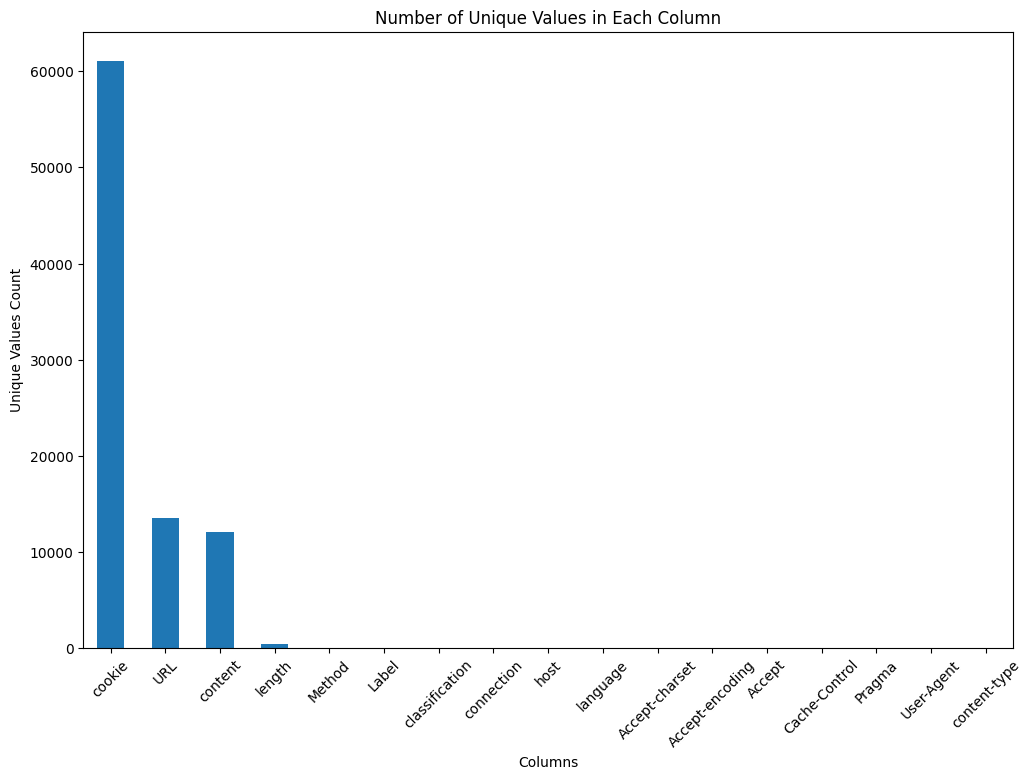

In [17]:
# 計算每個欄位中 unique 值的數量
unique_counts = df_.nunique()
unique_counts_sorted = unique_counts.sort_values(ascending=False)
print(f"The unique_counts of each df's feature: \n{unique_counts_sorted}\n")

# 畫出視覺圖
plt.figure(figsize=(12, 8))
unique_counts_sorted.plot(kind='bar')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Unique Values Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
# 列出除指定的四個欄位之外的其他欄位
columns_to_print = [col for col in df_.columns if col not in ['cookie', 'URL', 'content', 'length']]

# 打印每個欄位中的唯一資料
for col in columns_to_print:
    unique_values = df_[col].unique()
    print(f"欄位名稱: {col}")
    print("Unique Data:")
    for val in unique_values:
        print(f"  - {val}")
    print("\n")

欄位名稱: Label
Unique Data:
  - Normal
  - Anomalous


欄位名稱: Method
Unique Data:
  - GET
  - POST
  - PUT


欄位名稱: User-Agent
Unique Data:
  - Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)


欄位名稱: Pragma
Unique Data:
  - no-cache


欄位名稱: Cache-Control
Unique Data:
  - no-cache


欄位名稱: Accept
Unique Data:
  - text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5
  - nan


欄位名稱: Accept-encoding
Unique Data:
  - x-gzip, x-deflate, gzip, deflate


欄位名稱: Accept-charset
Unique Data:
  - utf-8, utf-8;q=0.5, *;q=0.5


欄位名稱: language
Unique Data:
  - en


欄位名稱: host
Unique Data:
  - localhost:8080
  - localhost:9090


欄位名稱: content-type
Unique Data:
  - nan
  - application/x-www-form-urlencoded


欄位名稱: connection
Unique Data:
  - close
  - Connection: close


欄位名稱: classification
Unique Data:
  - 0
  - 1




In [19]:
# 特別將有缺失值的欄位標注出來
for col in ['Accept']:
    unique_values = df_[col].unique()
    print(f"欄位名稱: {col}")
    print("Unique Data:")
    for val in unique_values:
        print(f"  - {val}")
    print("\n")


欄位名稱: Accept
Unique Data:
  - text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5
  - nan




針對「缺失值」填補策略：
- 原本對於 Accept 欄位，可以用一個常見的 MIME 類型填補缺失值，例如 */* 表示接受所有類型。
1. Accept 以 `*/*`, `nan`以及篩除此 feature 分別對缺失資料進行處理，並測試三種填補方式對於模型的重要性。


#### 特定欄位類別分佈

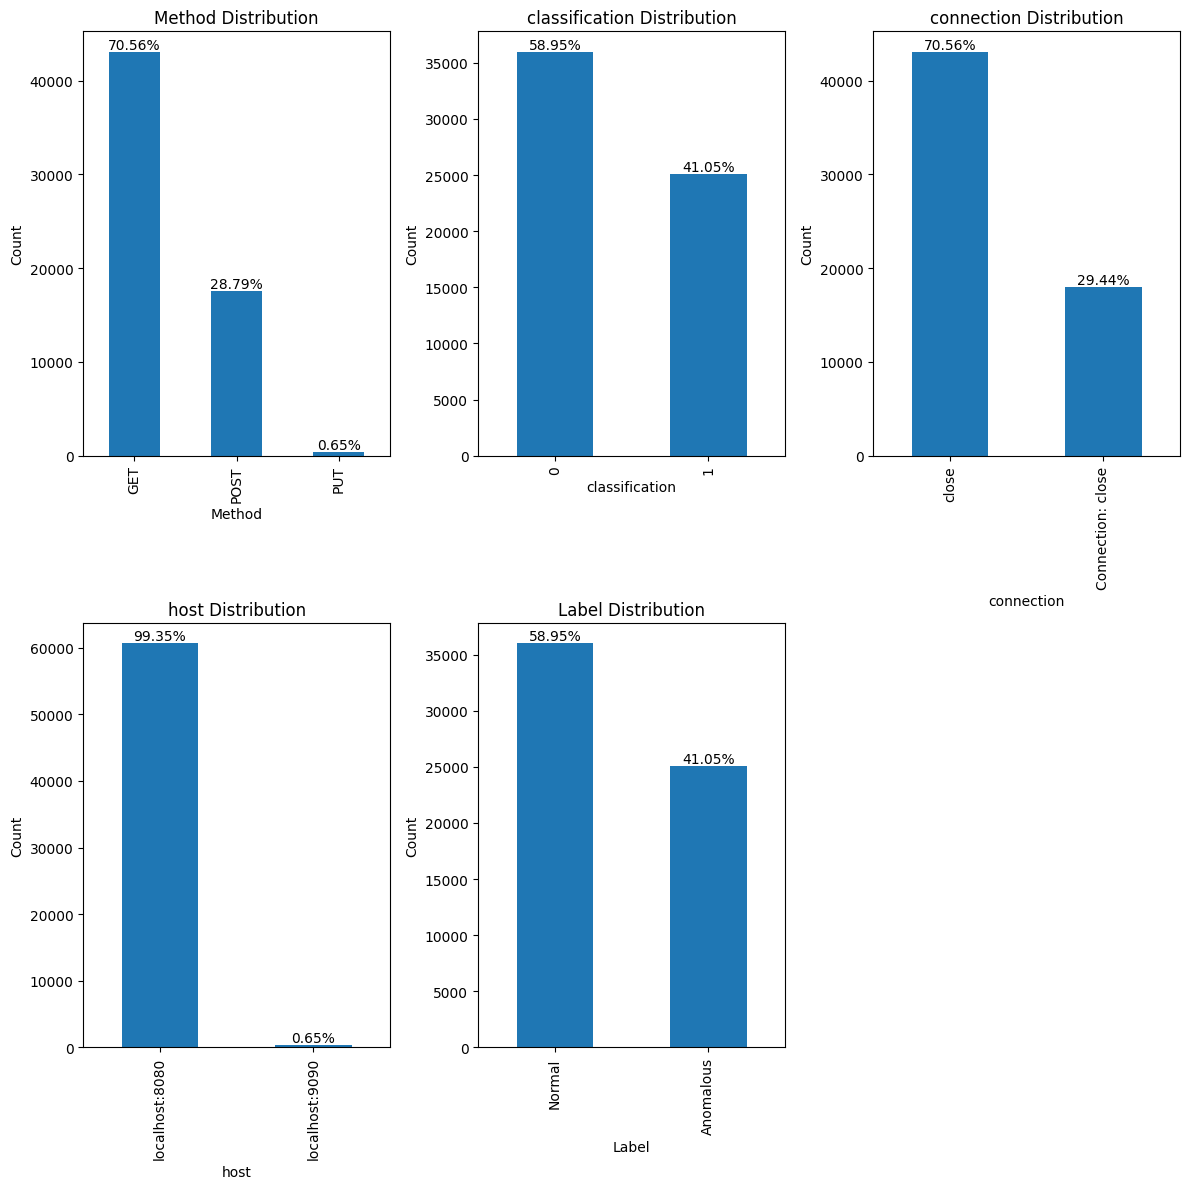

In [20]:
# 要繪製長條圖的欄位
categorical_columns = ['Method', 'classification', 'connection', 'host', 'Label']

# 調整為 2 行 3 列，以便容納 5 個圖表
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

for i, col in enumerate(categorical_columns):
    ax = axes[i//3, i%3]
    value_counts = df_[col].value_counts()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    for p in ax.patches:
        percentage = f'{(p.get_height() / len(df_[col]) * 100):.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# 調整圖形佈局，留出空白的第六個子圖
fig.delaxes(axes[1, 2])
fig.tight_layout()


#### Content 相關欄位探索（content, content-type, length）

In [21]:
# 特別將有缺失值的欄位標注出來

for col in ['content-type']:
    unique_values = df_[col].unique()
    print(f"欄位名稱: {col}")
    print("Unique Data:")
    for val in unique_values:
        print(f"  - {val}")
    print("\n")


欄位名稱: content-type
Unique Data:
  - nan
  - application/x-www-form-urlencoded




我們注意到 `content-type` 欄位中除了缺失值以外，只有  ` - application/x-www-form-urlencoded` 這一種類別。這可以幫助我們去針對 content 欄位進行處理，我們可以依照這個 type 把不同的 key 以及數值挑出來，作為另一個特徵

例如

Content-Type: application/x-www-form-urlencoded
Content：id=3&nombre=Vino+Rioja&precio=100&cantidad=55&B1=A%F1adir+al+carrito
解析：

* id=3 表示 id 為 3
* nombre=Vino+Rioja 表示名稱為 Vino Rioja
* precio=100 表示價格為 100
* cantidad=55 表示數量為 55
* B1=A%F1adir+al+carrito 表示按鈕文字為 Añadir al carrito（添加到購物車）

因此，我們進一步來看這三個欄位的狀況

In [22]:

import json
from collections import defaultdict

# 將 'content' 欄位拆解為 JSON 格式，並存儲在一個變數中
json_data = []

for i, row in df_.iterrows():
    if pd.notna(row['content-type']):
        content = row['content']
        if pd.notna(content):
            json_obj = dict(item.split('=') for item in content.split('&'))
            json_data.append(json_obj)

# 檢測獨特的 keys
unique_keys = set()
key_combinations = defaultdict(int)

for json_obj in json_data:
    keys = tuple(sorted(json_obj.keys()))
    unique_keys.update(keys)
    key_combinations[keys] += 1

# 獨特的 keys
unique_keys = list(unique_keys)
print("獨特的 keys:", unique_keys)

# 不同 keys 組合的數量
key_combinations_count = len(key_combinations)
print("不同 keys 組合的數量:", key_combinations_count)

# 每種 keys 組合出現的次數
print("每種 keys 組合出現的次數:")
for keys, count in key_combinations.items():
    print(f"{keys}: {count}")


獨特的 keys: ['dni', 'ntcA', 'cpA', 'precioA', 'cp', 'nombre', 'direccion', 'remember', 'B2', 'rememberA', 'B1A', 'modo', 'errorMsg', 'emailA', 'errorMsgA', 'provincia', 'id', 'cantidadA', 'direccionA', 'B1', 'loginA', 'nombreA', 'ciudadA', 'provinciaA', 'dniA', 'apellidos', 'login', 'pwdA', 'precio', 'pwd', 'ntc', 'cantidad', 'email', 'apellidosA', 'password', 'idA', 'passwordA', 'B2A', 'modoA', 'ciudad']
不同 keys 組合的數量: 36
每種 keys 組合出現的次數:
('B1', 'cantidad', 'id', 'nombre', 'precio'): 1993
('B1', 'login', 'modo', 'pwd', 'remember'): 1977
('id',): 1552
('errorMsg',): 1494
('B1', 'modo', 'precio'): 1942
('B1', 'apellidos', 'ciudad', 'cp', 'direccion', 'dni', 'email', 'login', 'modo', 'nombre', 'ntc', 'password', 'provincia'): 3940
('B2',): 1514
('B1', 'login', 'modo', 'pwd', 'rememberA'): 84
('idA',): 451
('errorMsgA',): 444
('B1A', 'modo', 'precio'): 156
('B1', 'apellidos', 'ciudad', 'cp', 'direccion', 'dniA', 'email', 'login', 'modo', 'nombre', 'ntc', 'password', 'provincia'): 69
('B2A',

可以看到 content 欄位的組合以及各種不同 keys 的排列組合有 36 種，且資料各異。
因此我們直接讓語言模型進行閱讀即可，先不另外做處理。
日後若需要，可以進一步將這些數據轉為結構化數據

In [23]:
# 接著來看一下 length 欄位原始數據
unique_values = df_['length'].unique().tolist()
print("前三筆 length 資料:")
for val in unique_values[0:3]:
    print(f"  - {val}")


前三筆 length 資料:
  - nan
  - Content-Length: 68
  - Content-Length: 63


In [24]:
# 我們看到 length 欄位中每一個資料都有 'Content-Length:' 的前綴，應當去除，但保留 Nan
df_numeric_length = df_.copy()
df_numeric_length['length'] = df_numeric_length['length'].apply(lambda x: int(x.replace('Content-Length: ', '')) if pd.notna(x) else x)
df_numeric_length.head(3)

,Label,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,length,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...


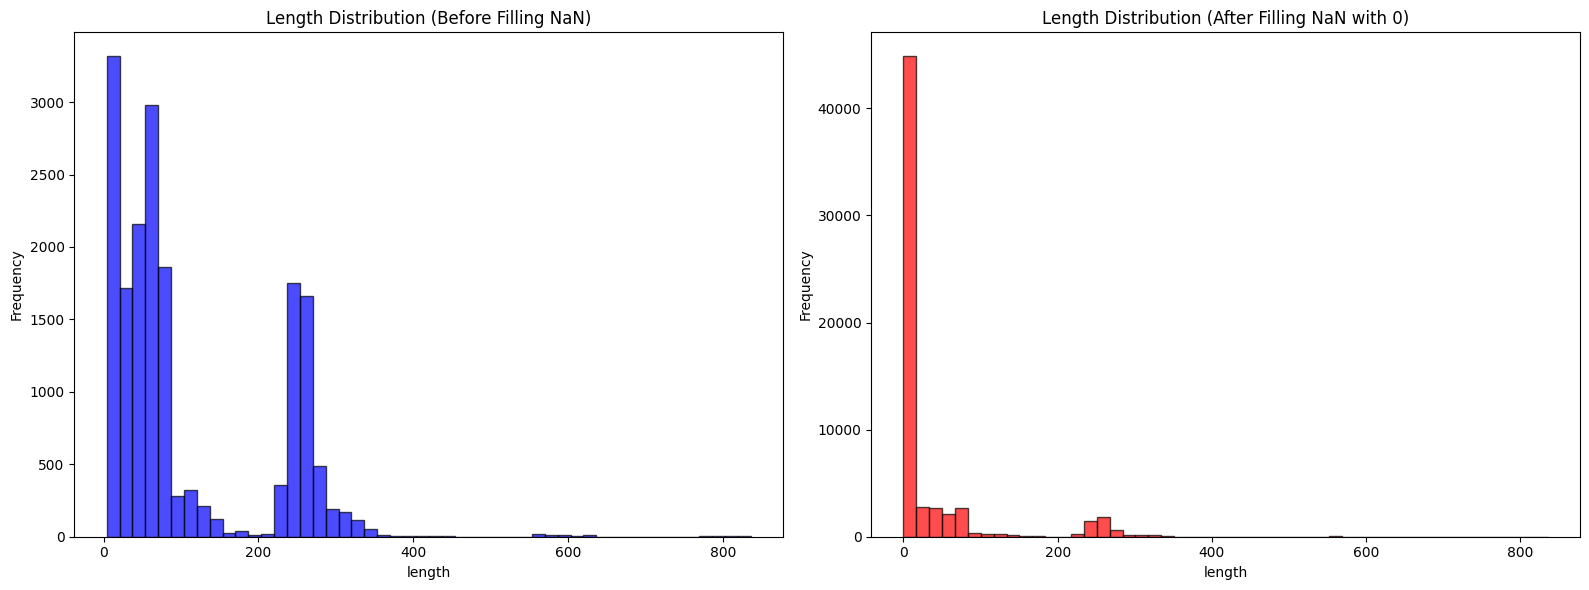

In [25]:

# 設置圖形佈局
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 繪製填補缺失值之前的分佈圖
df_numeric_length['length'].plot(kind='hist', bins=50, ax=axes[0], color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title('Length Distribution (Before Filling NaN)')
axes[0].set_xlabel('length')
axes[0].set_ylabel('Frequency')

# 複製一份 df
df_numeric_length_copy = df_numeric_length.copy()

# 填補缺失值
df_numeric_length_copy['length'] = df_numeric_length_copy['length'].apply(lambda x: 0 if pd.isna(x) else x)

# 繪製填補缺失值之後的分佈圖
df_numeric_length_copy['length'].plot(kind='hist', bins=50, ax=axes[1], color='red', edgecolor='black', alpha=0.7)
axes[1].set_title('Length Distribution (After Filling NaN with 0)')
axes[1].set_xlabel('length')
axes[1].set_ylabel('Frequency')

# 調整圖形佈局
plt.tight_layout()
plt.show()

# Preprocess the numeric data

## 缺失值填補

In [26]:
# 將缺失值進行填補
# 對於 Accept 欄位，可以用一個常見的 MIME 類型填補缺失值，例如 */* 表示接受所有類型。
# 對於 content-type、length 和 content 欄位，可以用 'unknown'、0 和 '' 分別填補缺失值。

df2_ = df_numeric_length.copy()

# 填補缺失值
df2_['Accept'].fillna('*/*', inplace=True)
df2_['content-type'].fillna('unknown', inplace=True)
df2_['length'].fillna(0, inplace=True)
df2_['content'].fillna('', inplace=True)

# 檢查處理後的缺失值
df2_.isnull().sum()

Label              0
Method             0
User-Agent         0
Pragma             0
Cache-Control      0
Accept             0
Accept-encoding    0
Accept-charset     0
language           0
host               0
cookie             0
content-type       0
connection         0
length             0
content            0
classification     0
URL                0
dtype: int64

In [27]:
df2_.head(3)

,Label,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,length,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,unknown,close,0.0,,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,unknown,close,0.0,,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...


## Drop 掉無意義欄位

In [28]:
# 步驟 1：丟掉只有一種類別的欄位，因為對模型來說無意義

columns_to_drop = [
    'Accept-charset', 'Accept-encoding', 'Accept',
    'Cache-Control', 'Pragma', 'User-Agent', 'language'
]
df2_ = df2_.drop(columns=columns_to_drop)
df2_.head(3)

,Label,Method,host,cookie,content-type,connection,length,content,classification,URL
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,unknown,close,0.0,,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,unknown,close,0.0,,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...


## 將特定欄位進行 One hot encoding

In [29]:
# 將指定的欄位轉為 One-Hot Encoding
columns_to_one_hot_encode = [
    'Method', 'classification', 'connection', 'host', 'content-type'
]
df2_ = pd.get_dummies(df2_, columns=columns_to_one_hot_encode)
df2_.head(3)

,Label,cookie,length,content,URL,Method_GET,Method_POST,Method_PUT,classification_0,classification_1,connection_Connection: close,connection_close,host_localhost:8080,host_localhost:9090,content-type_application/x-www-form-urlencoded,content-type_unknown
0,Normal,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0.0,,http://localhost:8080/tienda1/index.jsp HTTP/1.1,True,False,False,True,False,False,True,True,False,False,True
1,Normal,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0.0,,http://localhost:8080/tienda1/publico/anadir.j...,True,False,False,True,False,False,True,True,False,False,True
2,Normal,JSESSIONID=933185092E0B668B90676E0A2B0767AF,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,http://localhost:8080/tienda1/publico/anadir.j...,False,True,False,True,False,True,False,True,False,True,False


## 針對 Content 進行 one hot

In [30]:
df2_.head(3)

,Label,cookie,length,content,URL,Method_GET,Method_POST,Method_PUT,classification_0,classification_1,connection_Connection: close,connection_close,host_localhost:8080,host_localhost:9090,content-type_application/x-www-form-urlencoded,content-type_unknown
0,Normal,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0.0,,http://localhost:8080/tienda1/index.jsp HTTP/1.1,True,False,False,True,False,False,True,True,False,False,True
1,Normal,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0.0,,http://localhost:8080/tienda1/publico/anadir.j...,True,False,False,True,False,False,True,True,False,False,True
2,Normal,JSESSIONID=933185092E0B668B90676E0A2B0767AF,68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,http://localhost:8080/tienda1/publico/anadir.j...,False,True,False,True,False,True,False,True,False,True,False


In [31]:
unique_keys

['dni',
 'ntcA',
 'cpA',
 'precioA',
 'cp',
 'nombre',
 'direccion',
 'remember',
 'B2',
 'rememberA',
 'B1A',
 'modo',
 'errorMsg',
 'emailA',
 'errorMsgA',
 'provincia',
 'id',
 'cantidadA',
 'direccionA',
 'B1',
 'loginA',
 'nombreA',
 'ciudadA',
 'provinciaA',
 'dniA',
 'apellidos',
 'login',
 'pwdA',
 'precio',
 'pwd',
 'ntc',
 'cantidad',
 'email',
 'apellidosA',
 'password',
 'idA',
 'passwordA',
 'B2A',
 'modoA',
 'ciudad']

In [32]:

# 創建新的 DataFrame，將每個 unique key 作為一個特徵
new_features_df = pd.DataFrame(0, index=df2_.index, columns=unique_keys)

# 將 content 資料解析成字典，並填充新的特徵
for i, row in df2_.iterrows():
    if row['content'] != '':
        content_dict = dict(item.split('=') for item in row['content'].split('&'))
        for key in unique_keys:
            if key in content_dict:
                new_features_df.at[i, key] = content_dict[key]

# 將新的特徵 DataFrame 合併到原始 DataFrame 中
df2_ = pd.concat([df2_.drop(columns=['content']), new_features_df], axis=1)

# 檢查結果
df2_.head(3)

,Label,cookie,length,URL,Method_GET,Method_POST,Method_PUT,classification_0,classification_1,connection_Connection: close,...,ntc,cantidad,email,apellidosA,password,idA,passwordA,B2A,modoA,ciudad
0,Normal,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0.0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,Normal,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0.0,http://localhost:8080/tienda1/publico/anadir.j...,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,Normal,JSESSIONID=933185092E0B668B90676E0A2B0767AF,68.0,http://localhost:8080/tienda1/publico/anadir.j...,False,True,False,True,False,True,...,0,55,0,0,0,0,0,0,0,0


## 針對 URL、cookies 欄位進行處理

URL 欄位處理

解析 URL：可以將 URL 分解為不同的組成部分（協議、域名、路徑、查詢參數等）。
提取信息：將 URL 中的各個部分提取為單獨的特徵。

cookie 欄位處理

解析 Cookie：將 Cookie 中的每個鍵值對分解出來。
提取信息：將每個鍵值對提取為單獨的特徵。

In [33]:
df2_.loc[0, ['URL', 'cookie']]

URL       http://localhost:8080/tienda1/index.jsp HTTP/1.1
cookie         JSESSIONID=1F767F17239C9B670A39E9B10C3825F4
Name: 0, dtype: object

In [34]:
from urllib.parse import urlparse, parse_qs

# 解析 URL 欄位
def parse_url(url):
    parsed_url = urlparse(url)
    url_features = {
        'protocol': parsed_url.scheme,
        'domain': parsed_url.netloc,
        'path': parsed_url.path,
        'query': parsed_url.query
    }
    return url_features

# 解析 Cookie 欄位
def parse_cookie(cookie):
    cookie_features = dict(item.split('=') for item in cookie.split('; ') if '=' in item)
    return cookie_features

# 創建新的特徵 DataFrame
url_features_df = pd.DataFrame(df2_['URL'].apply(parse_url).tolist())
cookie_features_df = pd.DataFrame(df2_['cookie'].dropna().apply(parse_cookie).tolist()).fillna('')

# 將新的特徵 DataFrame 合併到原始 DataFrame 中
df2_ = pd.concat([df2_.drop(columns=['URL', 'cookie']), url_features_df, cookie_features_df], axis=1)

# 檢查結果
df2_.head(3)


,Label,length,Method_GET,Method_POST,Method_PUT,classification_0,classification_1,connection_Connection: close,connection_close,host_localhost:8080,...,idA,passwordA,B2A,modoA,ciudad,protocol,domain,path,query,JSESSIONID
0,Normal,0.0,True,False,False,True,False,False,True,True,...,0,0,0,0,0,http,localhost:8080,/tienda1/index.jsp HTTP/1.1,,1F767F17239C9B670A39E9B10C3825F4
1,Normal,0.0,True,False,False,True,False,False,True,True,...,0,0,0,0,0,http,localhost:8080,/tienda1/publico/anadir.jsp,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,81761ACA043B0E6014CA42A4BCD06AB5
2,Normal,68.0,False,True,False,True,False,True,False,True,...,0,0,0,0,0,http,localhost:8080,/tienda1/publico/anadir.jsp HTTP/1.1,,933185092E0B668B90676E0A2B0767AF


In [35]:
df2_.iloc[2,:]

Label                                                                           Normal
length                                                                            68.0
Method_GET                                                                       False
Method_POST                                                                       True
Method_PUT                                                                       False
classification_0                                                                  True
classification_1                                                                 False
connection_Connection: close                                                      True
connection_close                                                                 False
host_localhost:8080                                                               True
host_localhost:9090                                                              False
content-type_application/x-www-form-urlenco

In [36]:
# 計算每個欄位中 unique 值的數量
unique_counts = df2_.nunique()
unique_counts_sorted = unique_counts.sort_values(ascending=False)
print(f"The unique_counts of each df's feature: \n{unique_counts_sorted}\n")

The unique_counts of each df's feature: 
JSESSIONID                                        61065
query                                             11857
login                                              4409
password                                           3072
direccion                                          3070
email                                              2886
ntc                                                2665
dni                                                2648
apellidos                                          2617
ciudad                                             2562
cp                                                 2331
nombre                                             2123
pwd                                                1699
path                                               1642
precio                                             1537
length                                              383
provincia                                           189
B1     

In [37]:
# 除掉 protocol, JSESSIONID 兩個欄位
# 因為兩個欄位對模型來說沒有幫助

df2_.drop(columns=['protocol', 'JSESSIONID'], inplace=True)

# 確認列是否已刪除
df2_.head(3)

,Label,length,Method_GET,Method_POST,Method_PUT,classification_0,classification_1,connection_Connection: close,connection_close,host_localhost:8080,...,apellidosA,password,idA,passwordA,B2A,modoA,ciudad,domain,path,query
0,Normal,0.0,True,False,False,True,False,False,True,True,...,0,0,0,0,0,0,0,localhost:8080,/tienda1/index.jsp HTTP/1.1,
1,Normal,0.0,True,False,False,True,False,False,True,True,...,0,0,0,0,0,0,0,localhost:8080,/tienda1/publico/anadir.jsp,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...
2,Normal,68.0,False,True,False,True,False,True,False,True,...,0,0,0,0,0,0,0,localhost:8080,/tienda1/publico/anadir.jsp HTTP/1.1,


In [38]:

# 創建一個字典來存儲每個欄位的資料型態列表
column_types = {}

for column in df2_.columns:
    unique_counts = df2_[column].nunique()
    column_types[column] = (df2_[column].apply(type).unique().tolist(), unique_counts)

column_types

{'Label': ([str], 2),
 'length': ([float], 383),
 'Method_GET': ([bool], 2),
 'Method_POST': ([bool], 2),
 'Method_PUT': ([bool], 2),
 'classification_0': ([bool], 2),
 'classification_1': ([bool], 2),
 'connection_Connection: close': ([bool], 2),
 'connection_close': ([bool], 2),
 'host_localhost:8080': ([bool], 2),
 'host_localhost:9090': ([bool], 2),
 'content-type_application/x-www-form-urlencoded': ([bool], 2),
 'content-type_unknown': ([bool], 2),
 'dni': ([int, str], 2648),
 'ntcA': ([int, str], 72),
 'cpA': ([int, str], 69),
 'precioA': ([int, str], 150),
 'cp': ([int, str], 2331),
 'nombre': ([int, str], 2123),
 'direccion': ([int, str], 3070),
 'remember': ([int, str], 68),
 'B2': ([int, str], 82),
 'rememberA': ([int, str], 3),
 'B1A': ([int, str], 6),
 'modo': ([int, str], 137),
 'errorMsg': ([int, str], 82),
 'emailA': ([int, str], 71),
 'errorMsgA': ([int, str], 2),
 'provincia': ([int, str], 189),
 'id': ([int, str], 142),
 'cantidadA': ([int, str], 54),
 'direccionA': (

In [39]:
df2_['errorMsgA'].unique().tolist()

[0, 'Credenciales+incorrectas']

## Encoding

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

### One hot encoding

one_hot_encode_columns = ['domain']


In [41]:
# One-Hot Encoding
one_hot_encode_columns = ['domain']
for column in one_hot_encode_columns:
    ohe = OneHotEncoder(sparse=False)
    transformed_data = ohe.fit_transform(df2_[[column]])
    transformed_df2_ = pd.DataFrame(transformed_data, columns=[f"{column}_{category}" for category in ohe.categories_[0]])
    df2_ = pd.concat([df2_.drop(columns=[column]), transformed_df2_], axis=1)

transformed_df2_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,domain_localhost:8080,domain_localhost:8080.BAK HTTP,domain_localhost:8080.Bak HTTP,domain_localhost:8080.INC HTTP,domain_localhost:8080.Inc HTTP,domain_localhost:8080.OLD HTTP,domain_localhost:8080.Old HTTP,domain_localhost:8080.bak HTTP,domain_localhost:8080.inc HTTP,domain_localhost:8080.java HTTP,domain_localhost:8080.old HTTP,domain_localhost:8080http:,domain_localhost:8080~ HTTP
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61063,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Label Encoding

label_encode_columns = ['B2A', 'errorMsg', 'rememberA', 'modoA', 'idA', 'errorMsgA', 'provinciaA', 'ntcA', 'cpA', 'emailA', 'cantidadA', 'dniA']


In [ ]:

from sklearn.preprocessing import LabelEncoder

# 定義需要進行 Label Encoding 的欄位
columns_to_encode = ['dni', 'ntcA', 'cpA', 'precioA', 'cp', 'nombre', 'direccion', 'remember', 'B2',
                     'rememberA', 'B1A', 'modo', 'errorMsg', 'emailA', 'errorMsgA', 'provincia', 'id',
                     'cantidadA', 'direccionA', 'B1', 'loginA', 'nombreA', 'ciudadA', 'provinciaA',
                     'dniA', 'apellidos', 'login', 'pwdA', 'precio', 'pwd', 'ntc', 'cantidad', 'email',
                     'apellidosA', 'password', 'idA', 'passwordA', 'B2A', 'modoA', 'ciudad', 'path']

# 對每個欄位進行 Label Encoding
for column in columns_to_encode:
    le = LabelEncoder()
    df2_[column] = le.fit_transform(df2_[column].astype(str))

# 顯示進行 Label Encoding 的欄位
df2_[columns_to_encode]


,dni,ntcA,cpA,precioA,cp,nombre,direccion,remember,B2,rememberA,...,cantidad,email,apellidosA,password,idA,passwordA,B2A,modoA,ciudad,path
0,16,0,0,0,17,52,17,21,27,0,...,23,24,0,79,0,2,0,0,36,791
1,16,0,0,0,17,52,17,21,27,0,...,23,24,0,79,0,2,0,0,36,1208
2,16,0,0,0,17,1983,17,21,27,0,...,93,24,0,79,0,2,0,0,36,1209
3,16,0,0,0,17,52,17,21,27,0,...,23,24,0,79,0,2,0,0,36,1275
4,16,0,0,0,17,52,17,29,27,0,...,23,24,0,79,0,2,0,0,36,1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,16,0,0,0,17,52,17,21,27,0,...,23,24,0,79,0,2,0,0,36,875
61061,16,0,0,0,2005,1418,984,21,27,0,...,23,1182,0,2650,0,2,0,0,363,876
61062,16,0,0,0,17,52,17,21,27,0,...,23,24,0,79,0,2,0,0,36,883
61063,16,0,0,0,17,52,17,21,27,0,...,23,24,0,79,0,2,0,0,36,613


In [ ]:

# 創建一個字典來存儲每個欄位的資料型態列表
column_types = {}

for column in df2_.columns:
    unique_counts = df2_[column].nunique()
    column_types[column] = (df2_[column].apply(type).unique().tolist(), unique_counts)

column_types

{'Label': ([str], 2),
 'length': ([float], 383),
 'Method_GET': ([bool], 2),
 'Method_POST': ([bool], 2),
 'Method_PUT': ([bool], 2),
 'classification_0': ([bool], 2),
 'classification_1': ([bool], 2),
 'connection_Connection: close': ([bool], 2),
 'connection_close': ([bool], 2),
 'host_localhost:8080': ([bool], 2),
 'host_localhost:9090': ([bool], 2),
 'content-type_application/x-www-form-urlencoded': ([bool], 2),
 'content-type_unknown': ([bool], 2),
 'dniA': ([int], 70),
 'login': ([int], 4409),
 'precio': ([int], 1536),
 'B2': ([int], 82),
 'ntc': ([int], 2665),
 'pwdA': ([int], 86),
 'cpA': ([int], 69),
 'apellidosA': ([int], 69),
 'password': ([int], 3072),
 'pwd': ([int], 1699),
 'ciudad': ([int], 2562),
 'idA': ([int], 4),
 'errorMsgA': ([int], 2),
 'remember': ([int], 68),
 'precioA': ([int], 150),
 'rememberA': ([int], 3),
 'errorMsg': ([int], 82),
 'apellidos': ([int], 2617),
 'direccion': ([int], 3070),
 'ntcA': ([int], 72),
 'provincia': ([int], 189),
 'direccionA': ([int

# Preprocess and split the two datas

In [49]:
base_df = df3_.copy()
easy_preprocess_df = all_in_one_df.copy()
hard_preprocessed_df = df2_.copy()


In [ ]:
base_df.head(3)

,Label,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,length,content,classification,URL
0,Normal,0,0,0,0,1,0,0,0,0,7623,0,1,0,0,0,800
1,Normal,0,0,0,0,1,0,0,0,0,31127,0,1,0,0,0,5503
2,Normal,1,0,0,0,1,0,0,0,0,35218,1,0,334,2191,0,3578


In [50]:
hard_preprocessed_df.head(3)

,Label,length,Method_GET,Method_POST,Method_PUT,classification_0,classification_1,connection_Connection: close,connection_close,host_localhost:8080,...,domain_localhost:8080.INC HTTP,domain_localhost:8080.Inc HTTP,domain_localhost:8080.OLD HTTP,domain_localhost:8080.Old HTTP,domain_localhost:8080.bak HTTP,domain_localhost:8080.inc HTTP,domain_localhost:8080.java HTTP,domain_localhost:8080.old HTTP,domain_localhost:8080http:,domain_localhost:8080~ HTTP
0,Normal,0.0,True,False,False,True,False,False,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Normal,0.0,True,False,False,True,False,False,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Normal,68.0,False,True,False,True,False,True,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
easy_preprocess_df.head(3)

,Label,HTTP_Request
0,Normal,GET http://localhost:8080/tienda1/index.jsp HT...
1,Normal,GET http://localhost:8080/tienda1/publico/anad...
2,Normal,POST http://localhost:8080/tienda1/publico/ana...


In [ ]:
# 用同樣的方法切分數據集 7:2:1 & stratified

from sklearn.model_selection import train_test_split

target_column = 'Label'

def stratified_split(df, target_column, train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    train_val_df, test_df = train_test_split(df, test_size=test_size, stratify=df[target_column], random_state=random_state)
    train_df, val_df = train_test_split(train_val_df, test_size=val_size/(train_size + val_size), stratify=train_val_df[target_column], random_state=random_state)

    return train_df, val_df, test_df

easy_train_df, easy_val_df, easy_test_df = stratified_split(easy_preprocess_df, target_column)

hard_train_df, hard_val_df, hard_test_df = stratified_split(hard_preprocessed_df, target_column)

base_train_df, base_val_df, base_test_df = stratified_split(base_df, target_column)

print("Easy Dataset Splits:")
print(f"Training set: {len(easy_train_df)} samples")
print(f"Validation set: {len(easy_val_df)} samples")
print(f"Test set: {len(easy_test_df)} samples")

print("\nHard Dataset Splits:")
print(f"Training set: {len(hard_train_df)} samples")
print(f"Validation set: {len(hard_val_df)} samples")
print(f"Test set: {len(hard_test_df)} samples")

print("\nBase Dataset Splits:")
print(f"Training set: {len(base_train_df)} samples")
print(f"Validation set: {len(base_val_df)} samples")
print(f"Test set: {len(base_test_df)} samples")

Easy Dataset Splits:
Training set: 48851 samples
Validation set: 6107 samples
Test set: 6107 samples

Hard Dataset Splits:
Training set: 48851 samples
Validation set: 6107 samples
Test set: 6107 samples

Base Dataset Splits:
Training set: 48851 samples
Validation set: 6107 samples
Test set: 6107 samples


In [56]:
# 將DataFrame保存到指定路徑
easy_train_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/easy_train_df.csv', index=False)
easy_val_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/easy_val_df.csv', index=False)
easy_test_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/easy_test_df.csv', index=False)

hard_train_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/hard_train_df.csv', index=False)
hard_val_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/hard_val_df.csv', index=False)
hard_test_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/hard_test_df.csv', index=False)

base_train_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/base_train_df.csv', index=False)
base_val_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/base_val_df.csv', index=False)
base_test_df.to_csv('/content/drive/MyDrive/瀚元資料/網路資安/Projects/base_test_df.csv', index=False)

print("Datasets have been saved to Google Drive.")

Datasets have been saved to Google Drive.


# Easy Preprocess's Models

## Load and preprocess data

In [6]:
# load data
file_paths = [
    '/content/drive/MyDrive/瀚元資料/網路資安/Projects/easy_train_df.csv',
    '/content/drive/MyDrive/瀚元資料/網路資安/Projects/easy_val_df.csv',
    '/content/drive/MyDrive/瀚元資料/網路資安/Projects/easy_test_df.csv'
]

# 讀取CSV檔案
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

easy_train_df = dfs[0]
easy_val_df = dfs[1]
easy_test_df = dfs[2]

In [7]:
easy_train_df.loc[0, 'HTTP_Request']

'GET http://localhost:8080/tienda1/publico/productos.jsp HTTP/1.1 HTTP/1.1\nUser-Agent: Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)\nPragma: no-cache\nCache-Control: no-cache\nAccept: text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5\nAccept-Encoding: x-gzip, x-deflate, gzip, deflate\nAccept-Charset: utf-8, utf-8;q=0.5, *;q=0.5\nLanguage: en\nHost: localhost:8080\nCookie: JSESSIONID=97C16F994A36FF5F52C65110E4F89B72\nConnection: close'

In [8]:
from sklearn.preprocessing import LabelEncoder

# 編碼標籤
label_encoder = LabelEncoder()
easy_train_df['Label'] = label_encoder.fit_transform(easy_train_df['Label'])
easy_val_df['Label'] = label_encoder.fit_transform(easy_val_df['Label'])
easy_test_df['Label'] = label_encoder.fit_transform(easy_test_df['Label'])


## Settings

In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

REPO_NAME = "hanyuany14"
FINE_TUNED_PREFFIX = "finetuned-DSCS24-final-project"
FINE_TUNED_TEXT_CLS_SUFFIX = "text-classification"

DISTIL_BERT = "distilbert/distilbert-base-uncased"

def get_CHECKPOINT_NAME(model_checkpoint: str):
    model_name = model_checkpoint.split("/")[-1]
    return f"{REPO_NAME}/{FINE_TUNED_PREFFIX}-{model_name}-{FINE_TUNED_TEXT_CLS_SUFFIX}"

FINE_TUNED_TEXT_CLS_CHECKPOINT = get_CHECKPOINT_NAME(DISTIL_BERT)

In [10]:
FINE_TUNED_TEXT_CLS_CHECKPOINT

'hanyuany14/finetuned-DSCS24-final-project-distilbert-base-uncased-text-classification'

## Login huggingface hub

In [11]:
from google.colab import userdata
from huggingface_hub import login

login(userdata.get('hugging_face_token'))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## LM Functions collection

In [12]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from datasets import Dataset
from transformers import Trainer, TrainingArguments

def load_model(model_checkpoint: str):
    base_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
    base_cls_model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

    return {
        'tokenizer': base_tokenizer,
        'cls_model': base_cls_model,
    }

def encode_texts(texts, labels, tokenizer, max_length=512):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=max_length)
    return encodings, labels.tolist()

# 創建 PyTorch Dataset
class HTTPDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

## Training

In [13]:
# 定義模型檢查點
model_checkpoints = [
    "distilbert/distilbert-base-uncased",
    # "FacebookAI/roberta-base",
    # "facebook/bart-large-mnli",
]

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from transformers import Trainer, TrainingArguments
import torch

# 自定義指標函數
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')  # 使用加權平均的F1分數
    return {'accuracy': accuracy, 'f1': f1}

# Initialize lists to store evaluation metrics and predictions
accuracy_scores = {'train': [], 'val': [], 'test': []}
f1_scores = {'train': [], 'val': [], 'test': []}
losses = []
conf_matrices = []
test_predictions = []

trainers = []  # 儲存trainer的列表

for checkpoint in model_checkpoints:
    selected_model = load_model(checkpoint)
    tokenizer = selected_model['tokenizer']
    model = selected_model['cls_model']

    train_texts, train_labels = encode_texts(easy_train_df['HTTP_Request'], easy_train_df['Label'], tokenizer)
    val_texts, val_labels = encode_texts(easy_val_df['HTTP_Request'], easy_val_df['Label'], tokenizer)
    test_texts, test_labels = encode_texts(easy_test_df['HTTP_Request'], easy_test_df['Label'], tokenizer)

    train_dataset = HTTPDataset(train_texts, train_labels)
    val_dataset = HTTPDataset(val_texts, val_labels)
    test_dataset = HTTPDataset(test_texts, test_labels)

    batch_size = 82
    logging_steps = 10

    training_args = TrainingArguments(
        output_dir=get_CHECKPOINT_NAME(checkpoint),
        overwrite_output_dir=True,
        evaluation_strategy="epoch",
        learning_rate=1e-5,
        weight_decay=0.1,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        load_best_model_at_end=True,
        save_strategy="epoch",
        save_total_limit=3,
        metric_for_best_model="eval_loss",
        greater_is_better=False,
        push_to_hub=True,
        fp16=True,
        logging_steps=logging_steps,
        num_train_epochs=5,
        lr_scheduler_type='cosine'
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics  # 添加計算指標函數
    )

    # Train the model
    trainer.train()

    # Push the model to Hugging Face Hub
    trainer.push_to_hub()

    # 儲存trainer
    trainers.append(trainer)

    # Clear GPU memory
    trainer.model.cpu()
    del trainer
    torch.cuda.empty_cache()


model.safetensors:  98%|#########7| 262M/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.078600,0.047554,0.984608,0.984573
2,0.021700,0.026472,0.991158,0.991155
3,0.022400,0.017082,0.995251,0.995249
4,0.007200,0.015752,0.995251,0.995249
5,0.015700,0.015246,0.995743,0.995741


In [17]:
# 訓練完成後，對每個模型進行評估
for trainer in trainers:
    trainer.model.to(device)  # 確保模型移動到設備上
    for split, dataset in zip(['train', 'val', 'test'], [train_dataset, val_dataset, test_dataset]):
        eval_result = trainer.evaluate(eval_dataset=dataset)
        accuracy_scores[split].append(eval_result['eval_accuracy'])
        f1_scores[split].append(eval_result['eval_f1'])
        if split == 'test':
            predictions = trainer.predict(dataset).predictions
            test_predictions.append(predictions)
            conf_matrices.append(confusion_matrix(test_labels, np.argmax(predictions, axis=1)))

# Save the evaluation metrics and predictions
# (You can save these lists as needed in a suitable format, such as JSON or CSV)

# 打印結果
print(f"Train Accuracy: {accuracy_scores['train']}")
print(f"Val Accuracy: {accuracy_scores['val']}")
print(f"Test Accuracy: {accuracy_scores['test']}")

print(f"Train F1 Scores: {f1_scores['train']}")
print(f"Val F1 Scores: {f1_scores['val']}")
print(f"Test F1 Scores: {f1_scores['test']}")

print("Test Confusion Matrices:")
for cm in conf_matrices:
    print(cm)

Train Accuracy: [0.9973388466970994]
Val Accuracy: [0.9957425904699525]
Test Accuracy: [0.9949238578680203]
Train F1 Scores: [0.9973376609216981]
Val F1 Scores: [0.9957410255593009]
Test F1 Scores: [0.9949212017973923]
Test Confusion Matrices:
[[2483   24]
 [   7 3593]]
